In [26]:
import cv2 as cv
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

%config IPCompleter.greedy=True

In [27]:
#read scanned data from text file

df = pd.read_csv('scanData.txt',delimiter=',')
x = df.values[:,0]
y = df.values[:,1]
#print(x,y)

df = pd.read_csv('scanData.txt',delimiter=',')
angle = df.values[:,0]
#print(angle)
distance = df.values[:,1]



In [28]:
#polar to cartesian converison
cartesian = [(r*math.cos(phi*math.pi/180), r*math.sin(phi*math.pi/180)) for r, phi in zip(distance, angle)]


In [29]:
#shift to all positive value
x, y = map(list, zip(*cartesian))
x=  np.array(x)
y=  np.array(y)

x+=  x.min()*-1
y+=  y.min()*-1

print(y.min())

data = np.vstack([y, x])


0.0


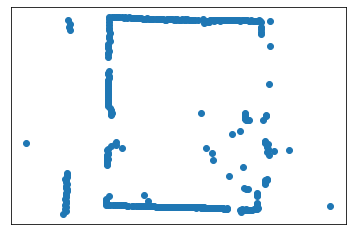

In [30]:
###only for matplotLib

#plt.scatter(y,x, color='yellowgreen', marker='.',label='Inliers')
plt.scatter(y,x)

###remove the axis tag from here
plt.xticks([])
plt.yticks([])


#plt.scatter(y,x)
plt.savefig('floor.png')
plt.show()

In [17]:
### canny edge detection

image = cv.imread('floor.png')
original = image.copy()
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
'''
cv.imshow("gray",gray)
cv.waitKey(1000)
cv.destroyAllWindows()
'''
canny = cv.Canny(gray,100,200)


## creating mask to hide axis

'''
Here's a simple approach:

Convert image to grayscale
Color threshold to isolate green
Find contours and fill in mask
Bitwise-and to get result
https://stackoverflow.com/questions/57940737/how-to-mask-everything-in-an-image-except-for-a-specific-color-inside
'''

lower = np.array([35, 0, 0], dtype="uint8")
upper = np.array([131, 255, 185], dtype="uint8")
mask = cv.inRange(image, lower, upper)

cnts = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cv.fillPoly(mask, cnts, (255,255,255))
result = cv.bitwise_and(original,original,mask=mask)


cv.imshow("result",result)
cv.waitKey(10000)
cv.destroyAllWindows()
###Hough transform

#gray = cv.cvtColor(result,cv.COLOR_BGR2GRAY)
#print(gray)
edges = cv.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

for x1,y1,x2,y2 in lines[0]:
    cv.line(image,(x1,y1),(x2,y2),(0,255,0),2)
#cv.imwrite('houghlines5.jpg',image)


cv.imshow("canny",image)
cv.waitKey(10000)
cv.destroyAllWindows()

NameError: name 'cv' is not defined

In [32]:
###### coverting this into 2d array

#x=x.reshape( 1,-1)

#print(x)
#y=y.reshape(1,-1)
print(x.min, x.max)

# generate coordinates of line
#x = np.arange(-200, 200)

#y = 0.2 * x + 20
data = np.vstack([x, y])
print(data.shape)
print(data)
img = np.zeros([100,100,3],dtype=np.uint8)
cv.imshow("data",data)
cv.waitKey(1000)
cv.destroyAllWindows()

<built-in method min of numpy.ndarray object at 0x000002E450F3BD00> <built-in method max of numpy.ndarray object at 0x000002E450F3BD00>
(2, 421)
[[5164.28204391 5044.68793381 5102.23957869 5094.43950427 5091.19905887
  5149.4145522  5123.39109922 5123.92598061 5119.01517193 5125.67862087
  5129.85014289 5124.75651178 5132.01811499 5119.18681952 5146.25150965
  5140.44827195 5133.1375509  5136.30187948 5140.83375222 5144.05368254
  5136.95009644 5136.35457893 5133.21515885 5128.8248354  5130.54352208
  5131.94884325 5135.54218444 5139.76093442 5136.62923368 5120.01424863
  5126.30290158 5133.18050559 5123.41008631 5126.41731263 5124.00208824
  5122.22955207 5122.41132091 5125.02302915 5121.32857809 5118.26866784
  5111.67341559 5111.97651825 5125.55603499 5118.38121018 5074.39005959
  4964.3718449  4890.25285765 4825.35744979 4763.76384694 5117.10638628
  4458.73482733 3452.86646797 2692.43321023 2660.18567256 2630.98831078
  2610.82972115 2588.84207779 2569.9499665  2552.4780184  2539.

In [ ]:
import cv2
import numpy as np

image = cv2.imread('floor-edited.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

minLineLength = 750
maxLineGap = 58
lines = cv2.HoughLinesP(close,1,np.pi/180,100,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image,(x1,y1),(x2,y2),(36,255,12),3)

cv2.imshow('thresh', thresh)
cv2.imshow('close', close)
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
#Import packages
import os
import cv2
import numpy as np
#import tensorflow as tf
import sys

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
#from utils import label_map_util
#from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
#MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'floor.png'
#Remove Small Items
im_gray = cv2.imread(IMAGE_NAME, cv2.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh = 127
im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
#find all your connected components 
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(im_bw, connectivity=8)
#connectedComponentswithStats yields every seperated component with information on each of them, such as size
#the following part is just taking out the background which is also considered a component, but most of the time we don't want that.
sizes = stats[1:, -1]; nb_components = nb_components - 1

# minimum size of particles we want to keep (number of pixels)
#here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever
min_size = 150  

#your answer image
img2 = np.zeros((output.shape))
#for every component in the image, you keep it only if it's above min_size
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        img2[output == i + 1] = 255

cv2.imshow('room detector', img2)
#MorphologicalTransform
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(img2, kernel)
erosion = cv2.erode(img2, kernel, iterations=6)

#cv2.imshow("img2", img2)
cv2.imshow("Dilation", dilation)
#cv2.imwrite("Dilation.jpg", dilation)
#cv2.imshow("Erosion", erosion)
image = dilation
#image = cv2.imread('floortest2.PNG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
#close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

minLineLength = 550
maxLineGap = 60
lines = cv2.HoughLinesP(close,1,np.pi/180,100,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image,(x1,y1),(x2,y2),(36,255,12),3)

cv2.imshow('thresh', thresh)
cv2.imshow('close', close)
cv2.imshow('image', image)
cv2.waitKey(10000)
cv2.destroyAllWindows()
# Press any key to close the image
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()

In [34]:
model = LineModelND()
model.estimate(data)
x1= np.arange(100,100)

fig,ax = plt.subplots()

print(model.params)
ax.plot(data[:,0], data[:,1], '.r')
ax.plot(x1, model.predict_y(x1))


NameError: name 'LineModelND' is not defined

In [ ]:


ax.plot(x1, model.predict_y(x1), '-b')
mode_robust, inliers = ransac (data, LineModelND, min_samples= 2, 
                               residual_threshold=2,
                               
                               
                               max_trials=1500)

outliers= (inliers== False)
print(data)
print(data[inliers])
x= mode_robust.predict_y(x1)
ax.plot(x1, x, '-y')


In [ ]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(data, 'RGB')
img.save('my.png')
img.show()